# CREDIT CARD FRAUD DETECTION USING SVM / DECISION TREE
STEP 1 - IMPORTING THE LIBRARIES

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize , StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")


STEP 2 - LOADING AND EXPLORING THE DATASET

In [109]:
url = "creditcard.csv"
raw_data = pd.read_csv(url)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<function matplotlib.pyplot.show(close=None, block=None)>

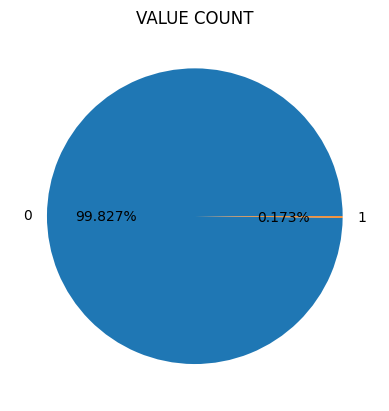

In [110]:
label = raw_data.Class.unique()

size = raw_data.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(size, labels = label , autopct = "%1.3f%%")
ax.set_title("VALUE COUNT")
plt.show

<Axes: >

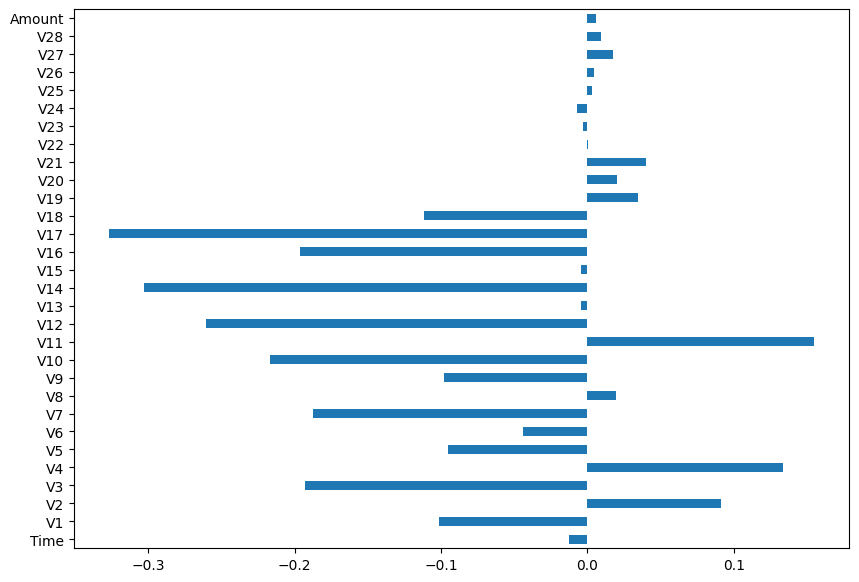

In [111]:
correlation = raw_data.corr()["Class"].drop("Class")
correlation.plot(kind = "barh", figsize =(10,7))

In [112]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

STEP 3 - Standardizing the Features

In [113]:
raw_data.iloc[:,1:30] = StandardScaler().fit_transform(raw_data.iloc[:,1:30])
raw_matrix = raw_data.values

X = raw_matrix[:,1:30]

y = raw_matrix[:,30] 

X = normalize(X, norm = "l1" )


STEP 4 - Dataset Train/Test Split

In [114]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3 , random_state = 42)

STEP 5 - MODEL TRAINING (DECISION TREE)

In [115]:
w_train = compute_sample_weight("balanced", y_train)

dt = DecisionTreeClassifier(criterion = "entropy" ,max_depth= 4, random_state = 35)
dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=35)

STEP 6 - SVM MODEL TRAINING

In [116]:
svm = LinearSVC(class_weight = "balanced", random_state= 31, loss = "hinge", fit_intercept=False)
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

Step 7 - Evaluate the Decision Tree Classifier Models

In [117]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

In [118]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.968


Step 8 - Evaluate the Support Vector Machine Models

In [119]:
y_pred_svm = svm.decision_function(X_test)

In [120]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986
